<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/04%20Clasificaci%C3%B3n%20y%20Agrupamiento/notebooks/08-Agrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 Modelos de agrupamiento (Clustering)</h1>

<h1>Agrupamiento - Clustering</h1>

&#128214; <u>Referencias bibliográficas</u>:
* Flach, Peter (2012). Machine Learning: The Art and Science of Algorithms that Make Sense of Data. Cambridge University Press.

# &#9991; <u> La tarea de clustering</u>

* El análisis de agrupamiento, o agrupamiento, es una tarea de aprendizaje automático no supervisada.

* Implica descubrir automáticamente la agrupación natural de los datos. A diferencia del aprendizaje supervisado (como el modelado predictivo), los algoritmos de agrupación solo interpretan los datos de entrada y encuentran grupos o agrupaciones naturales en el espacio de características.

* Un grupo es a menudo un área de densidad en el espacio de características donde los ejemplos del dominio (observaciones o filas de datos) están más cerca del grupo que otros grupos. El grupo puede tener un centro (el centroide) que es una muestra o un espacio de entidades de puntos y puede tener un límite o extensión.

* Es probable que estos grupos reflejen algún mecanismo en funcionamiento en el dominio del que se extraen las instancias, un mecanismo que hace que algunas instancias tengan un parecido más fuerte entre sí que con las instancias restantes.

* La agrupación en clústers puede ser útil como actividad de análisis de datos para obtener más información sobre el dominio del problema, el llamado descubrimiento de patrones o descubrimiento de conocimiento.

* El agrupamiento también puede ser útil como un tipo de ingeniería de características, donde los ejemplos existentes y nuevos se pueden mapear y etiquetar como pertenecientes a uno de los grupos identificados en los datos.

* La evaluación de los grupos identificados es subjetiva y puede requerir un experto en el dominio, aunque existen muchas medidas cuantitativas específicas de los grupos. Típicamente, los algoritmos de agrupamiento se comparan académicamente en conjuntos de datos sintéticos con grupos predefinidos, que se espera que descubra un algoritmo.

___

## Algoritmos de [agrupamiento en scikit-learn](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

* Hay muchos tipos de algoritmos de agrupamiento.

* Muchos algoritmos utilizan **grados de similitud** o **medidas de distancia** entre ejemplos en el espacio de características en un esfuerzo por descubrir regiones densas de observaciones. Como tal, a menudo es una buena práctica escalar datos antes de usar algoritmos de agrupamiento.

* Algunos algoritmos de agrupamiento requieren que se especifique el número de agrupaciones a descubrir en los datos, mientras que otros requieren la especificación de una distancia mínima entre observaciones en la que los ejemplos pueden considerarse "cercanos" o "conectados".

* Como tal, el análisis de clusters es un proceso iterativo en el que la evaluación subjetiva de los conglomerados identificados retroalimenta cambios en la configuración del algoritmo hasta que se logra un resultado deseado o apropiado.

## Demostración de algunos algoritmos de agrupamiento

In [56]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, OPTICS, AgglomerativeClustering

### Generación de datos sintéticos

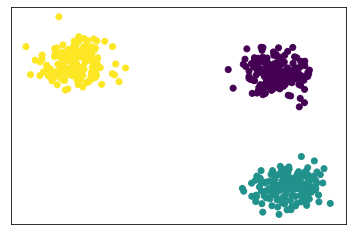

In [102]:
import numpy as np
from sklearn.datasets import make_classification, make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_blobs(n_samples=500,centers=3, random_state=24)
# X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

plt.figure()
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xticks([])
plt.yticks([])
plt.show()

En los métodos de clustering implementados en scikit-learn el clustering funciona de la siguiente manera:

1. Inicializar el objeto, por ejemplo `modelo = KMeans(n_clusters=3)`.
2. Hacer fit: `modelo.fit(X)`. Hay dos opciones:
    * Obtener la lista de etiquetas de clusters como `y_clusters = modelo.predict(X)`.
    * Obtener la lista de etiquetas de clusters usando el atributo `labels_` como `y_clusters = modelo.labels_`.

También pueden obtenerse las etiquetas de los clusters directamente con el método `fit_transform()`.

En esta notebook estaremos usando indistintamente los 3 métodos para ejemplificar su uso.

### [K-MEANS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

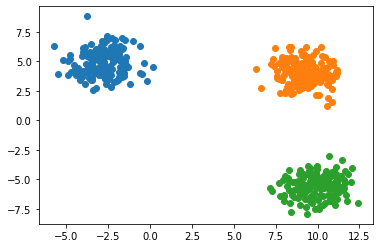

In [2]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)

modelo.fit(X)
y_clusters = modelo.predict(X)

clusters = np.unique(y_clusters)

for cluster in clusters:
    fila = np.where(y_clusters == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

Veamos los centroides de cada cluster

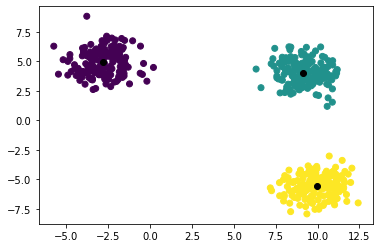

In [3]:
centers = modelo.cluster_centers_

plt.scatter(X[:, 0], X[:, 1],c=y_clusters)
plt.scatter(centers[:,0],centers[:,1],color='black')

plt.show()

**¿Cómo sabemos cuántos clusters buscar?**

Exploremos el **elbow value**.

Para esto, hay que graficar los valores de inercia de cada módelo de K-means para varios valores de $k$. El valor *elbow* representa el número óptimo de clusters, queda determinado por el *codo* en la curva graficada.

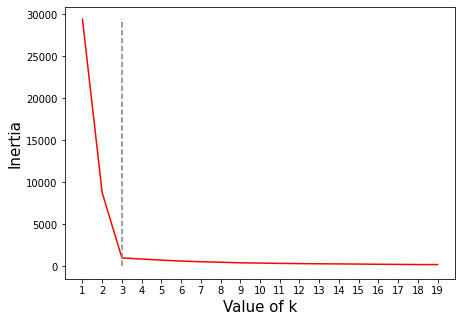

In [16]:
max_num_clusters = 20

inertias = []
k_values = list(range(1,max_num_clusters)) 
for k in k_values:
    modelo = KMeans(n_clusters=k)
    modelo.fit(X)
    inertias.append(modelo.inertia_)

plt.figure(figsize=(7,5))
plt.plot(k_values,inertias,color='red')
plt.plot([3,3],[0,max(inertias)],linestyle='dashed',color='gray')
plt.ylabel("Inertia", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.xticks(k_values)
plt.show()

**Silhoutte Score**

También podemos usar el **score de silueta**, el cual es un valor $-1\leq s\leq 1$ que mide que tan coherente son los puntos dentro de sus propios clusters, en términos de las distancias a los demás clusters. Entre más alto el valor, la configuración del clúster es apropiada. Este score es intrínseco del clustering.

Usaremos la implementación de [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

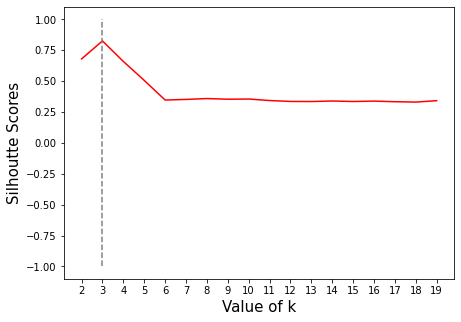

In [15]:
from sklearn.metrics import silhouette_score

max_num_clusters = 20

siluetas = []
k_values = list(range(2,max_num_clusters)) 
for k in k_values:
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    siluetas.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure(figsize=(7,5))
plt.plot(k_values,siluetas,color='red')
plt.plot([3,3],[-1,1],linestyle='dashed',color='gray')
plt.xticks(k_values)
plt.ylabel("Silhoutte Scores", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

**Adjusted Mutual Information (AMI)**

Es un score que asigna una puntuación a la comparación entre dos clusterings. La Información Mutua Ajustada mide que tanta información comparten dos clusterings en términos de los elementos que comparten, es decir, del tamaño de la intersección. 

Suele usarse para comparar un clustering *ground truth* contra uno que hemos obtenido.

Usaremos la implementación de [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html).

<img align="left" width="350" src="../img/ami.png"/>



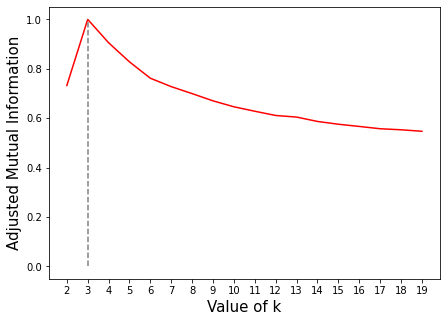

In [14]:
from sklearn.metrics import adjusted_mutual_info_score

max_num_clusters = 20

scores = []
k_values = list(range(2,max_num_clusters)) 
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    scores.append(adjusted_mutual_info_score(y, labels))

plt.figure(figsize=(7,5))
plt.plot(k_values,scores,color='red')
plt.plot([3,3],[0,1],linestyle='dashed',color='gray')
plt.xticks(k_values)
plt.ylabel("Adjusted Mutual Information", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

Como podemos ver, en los tres casos se valida la hipótesis de que el mejor valor para $K$ es $K=3$. Esta hipótesis tiene mayor peso por el conocimiento previo del problema, es decir, al generar los datos sabiamos que teniamos 3 grupos de puntos. 

### [Clustering Jerárquico](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

* La agrupación jerárquica es una familia general de algoritmos de agrupación que crean agrupaciones anidadas fusionándolas o dividiéndolas sucesivamente. Esta jerarquía de grupos se representa como un árbol (o dendrograma). La raíz del árbol es el grupo único que reúne todas las muestras, siendo las hojas los grupos con una sola muestra.
* El objeto [AgglomerativeClustering de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) realiza una agrupación jerárquica utilizando un enfoque ascendente (bottom-up): cada observación comienza en su propio grupo, y los grupos se fusionan sucesivamente. Los criterios de vinculación (_linkage_) determinan la métrica utilizada para la estrategia de fusión:
  - _Ward_ minimiza la suma de las diferencias al cuadrado dentro de todos los grupos. Es un enfoque que minimiza la varianza y, en este sentido, es similar a la función objetivo de k-means pero se aborda con un enfoque jerárquico aglomerativo.
  - _Maximum_ o _complete Linkage_ minimiza la distancia máxima entre observaciones de pares de grupos.
  - _Average linkage_ minimiza el promedio de las distancias entre todas las observaciones de pares de grupos.
  - _Single linkage_ minimiza la distancia entre las observaciones más cercanas de pares de grupos.



---


Se puede especificar, ya sea el número de clusters o el umbral de distancia máxima:

* Si `n_clusters`$\geq2$ entonces nos regresa ese número de clusters. 
* Si `n_clusters`=None, hay que especificar un `distance_threshold`.
* Si `distance_threshold`$\neq$None, `n_clusters` debe ser None y `compute_full_tree` debe ser True.


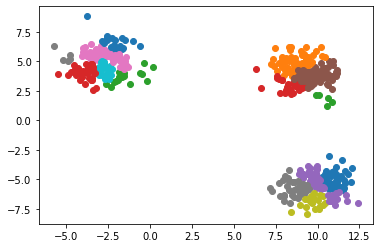

18 clusters encontrados.


In [111]:
from sklearn.cluster import AgglomerativeClustering

# modelo = AgglomerativeClustering(n_clusters=3)
# no_dendo = True

# descomenta la siguiente línea si quieres ver un dendograma 
modelo = AgglomerativeClustering(distance_threshold=5.0,n_clusters=None,compute_full_tree=True)
no_dendo=False


yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])
plt.show()

print(f"{len(clusters)} clusters encontrados.")

También podemos usar criterios externos para escoger un número de clusters adecuado. Por ejemplo, podemos usar el score de silueta. La conclusión es usar 3 clusters.

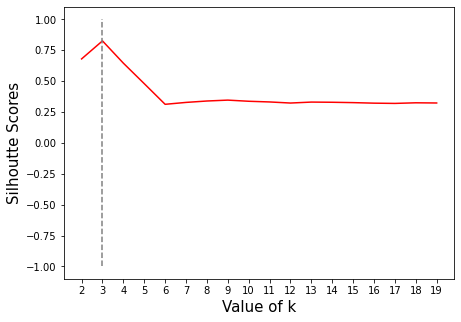

In [105]:
from sklearn.metrics import silhouette_score

max_num_clusters = 20

siluetas = []
k_values = list(range(2,max_num_clusters)) 
for k in k_values:
    ac = AgglomerativeClustering(n_clusters=k)
    ac.fit(X)
    labels = ac.labels_
    siluetas.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure(figsize=(7,5))
plt.plot(k_values,siluetas,color='red')
plt.plot([3,3],[-1,1],linestyle='dashed',color='gray')
plt.xticks(k_values)
plt.ylabel("Silhoutte Scores", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

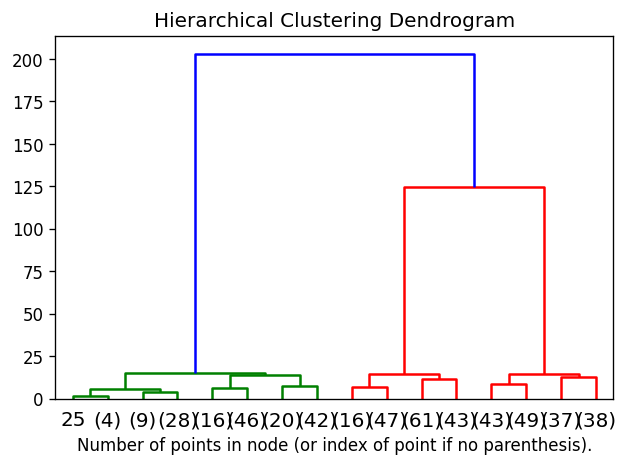

In [109]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

if not no_dendo:
    plt.figure(dpi=120)
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(modelo, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

### [Affinity Propagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)

* [Brendan J. Frey, Delbert Dueck (2007). Clustering by passing messages between data points. Science 315 (5814); pp. 972-6.](https://pdfs.semanticscholar.org/ea78/2c8b0848987e9575ea648e0419054d3f5bbf.pdf?_ga=2.62870572.1030401696.1591021245-1055786045.1581021538)

* "_Introducimos un método que considera simultáneamente todos los puntos de datos como ejemplos potenciales. Al ver cada punto de datos como un nodo en una red, ideamos un método que transmite de forma recurrente mensajes de valor real a través de la red hasta que surge un buen conjunto de ejemplares y grupos correspondientes. Como se describe más adelante, los mensajes se actualizan sobre la base de fórmulas simples que buscan mínimos de una función de energía elegida apropiadamente. En cualquier momento, la magnitud de cada mensaje refleja la afinidad actual que tiene un punto de datos para elegir otro punto de datos como su ejemplar, por lo que llamamos a nuestro método *propagación de afinidad*_".

<table>
    <td> <img align="left" width="100%" src="../img/affinity_propagation.jpg"/></td>
    <td> <img align="left" width="100%" src="../img/AP_RESP_DISP.jpg"/></td>
</table>

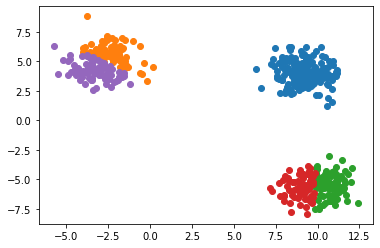

In [112]:
from sklearn.cluster import AffinityPropagation

modelo = AffinityPropagation(damping=0.9,max_iter=500,random_state=None)

modelo.fit(X)
yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

### [BIRCH](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html)
* Tian Zhang, Raghu Ramakrishnan and Miron Livny (1996). _BIRCH: An Efficient Data Clustering Method for Very Large Databases_.  ACM SIGMOD Record. DOI:10.1145/235968.233324.
* BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) es un método de clustering de tipo jerárquico bottom-up, especialmente diseñado para grandes bases de datos. 
* BIRCH agrupa de forma incremental y dinámica datos métricos (que satisfacen los requisitos de una métrica Euclidiana) multidimensionales de entrada para intentar producir la mejor calidad de agrupación con los recursos disponibles (es decir, memoria disponible y limitaciones de tiempo). 
* BIRCH es también el primer algoritmo de agrupamiento propuesto en el área de base de datos para manejar ruido (puntos que no son parte del patrón subyacente) de manera efectiva.
* El algoritmo BIRCH se basa en la construcción iterativa de un árbol cuyos nodos son tripletas (llamadas Clustering Features -CF) que resumen la información acerca de un cluster; CF=(N,LS,SS), donde N es el número de puntos en un cluster, LS es la suma lineal de los N puntos ($LS=\sum_i X_i$) y SS es la suma al cuadrado de los N puntos ($SS=\sum_i X_i^2$). La idea de CF es mantener una representación compacta de los clusters ya que su aglomeración se calcula fácilmente como $CF_i+CF_j=(N_i+N_j,LS_i+LS_j,SS_i+SS_j)$. Asimismo, se puede demostrar que a partir de $CF$ es posible calcular cualquier métrica de calidad usualmente empleada.
* La idea es construir el árbol de manera iterativa con base en un factor de ramificación B y un umbral T. Se parte de un nodo raíz al cuál se van agregando hijos ($child$'s) con base en una heurística.
* Cada nodo no-hoja contiene cuando mucho B entradas, y un nodo hoja representa un cluster hecho de todos los subclusters representados por sus entradas de forma $[CF_i]$, donde $i=1,2,\ldots,L$. Pero todas las entradas de un nodo hoja deben respetar el valor de umbral T, que representa la cota superior del diámetro (o radio) del cluster. El tamaño del árbol es función de T. Cuanto más grande, más pequeño el árbol.

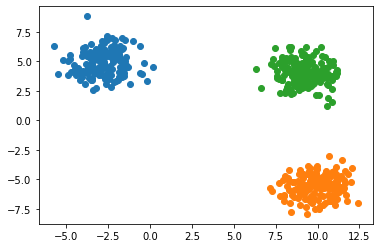

In [114]:
from sklearn.cluster import Birch

modelo = Birch(threshold=0.01, n_clusters=3)

modelo.fit(X)
yhat = modelo.predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

### [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
* [Martin Ester, Hans-Peter Kriegel, Jörg Sander, Xiaowei Xu (1996). _A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise_. Proceedings of Knowledge Discovery and Databases - The International Conference on Knowledge Discovery & Data Mining.](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)
* DBSCAN recurre a una noción de cúmulos basada en la densidad de los mismos, que está diseñada para descubrir grupos de formas arbitrarias. DBSCAN requiere solo un parámetro de entrada $\varepsilon$, el cual determina la distancia máxima entre dos puntos para considerarse cercanos. El otro parámetro importante es el `min_samples` el cual representa el número mínimo de puntos que puede haber en un cluster.
<br>
<img align="left" width="100%" src="../img/DBSCAN_1.jpg"/>
<br>
* "_La razón principal por la que reconocemos los grupos, es que dentro de cada grupo tenemos una densidad típica de puntos que es considerablemente más alta que fuera del grupo. Además, la densidad dentro de las áreas de ruido es menor que la densidad en cualquiera de los grupos._" 

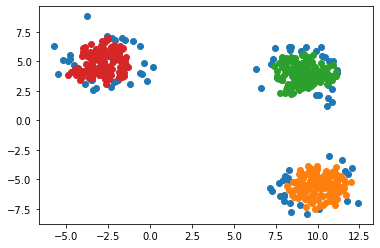

In [115]:
from sklearn.cluster import DBSCAN

modelo = DBSCAN(eps=0.530, min_samples=9)

yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

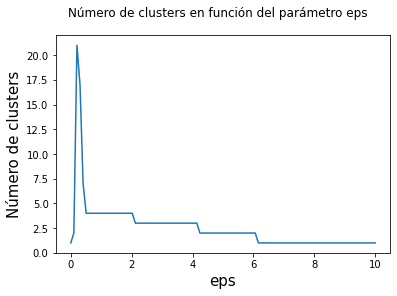

In [119]:
num_clusters = []
for eps in np.linspace(0.0001,10,100):
    modelo = DBSCAN(eps=eps, min_samples=5)
    yhat = modelo.fit_predict(X)
    clusters = np.unique(yhat)
    num_clusters.append(len(clusters))

plt.plot(list(np.linspace(0,10,100)),num_clusters)
plt.suptitle("Número de clusters en función del parámetro eps")
plt.xlabel("eps",fontsize=15)
plt.ylabel("Número de clusters", fontsize=15) 
plt.show()

### [OPTICS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html)

OPTICS (Ordering Points To Identify the Clustering Structure) está muy relacionado con DBSCAN, también encuentra puntos *nucleo* y expande a partir de ellos. A diferencia de DBSCAN, mantiene una jerarquía de clusters para un intervalo de radios pequeños. Es una mejor alternativa a DBSCAN en datasets grandes.

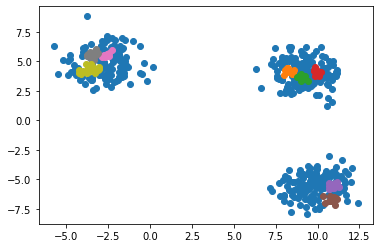

In [ ]:
from sklearn.cluster import OPTICS

modelo = OPTICS(max_eps=200, min_samples=9)

yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    filas = np.where(yhat == cluster)
    plt.scatter(X[filas, 0], X[filas, 1])

plt.show()

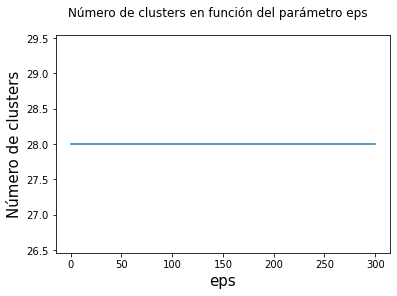

In [122]:
num_clusters = []
eps_values = list(np.linspace(0.1,300,100))
for eps in eps_values:
    modelo = OPTICS(eps=eps, min_samples=5)
    yhat = modelo.fit_predict(X)
    clusters = np.unique(yhat)
    num_clusters.append(len(clusters))

plt.plot(eps_values,num_clusters)
plt.suptitle("Número de clusters en función del parámetro eps")
plt.xlabel("eps",fontsize=15)
plt.ylabel("Número de clusters", fontsize=15) 
plt.show()

### [Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

* La agrupación espectral es una clase general de métodos de agrupación, extraída del álgebra lineal.

* "_Una alternativa prometedora que ha surgido recientemente en varios campos es utilizar métodos espectrales para la agrupación. Aquí, uno usa los vectores propios más altos de una matriz derivada de la distancia entre puntos._" [Andrew Y. Ng, Michael I. Jordan and Yair Weiss (2002). _On Spectral Clustering: Analysis and an algorithm_. In ADVANCES IN NEURAL INFORMATION PROCESSING SYSTEMS.](https://papers.nips.cc/paper/2092-on-spectral-clustering-analysis-and-an-algorithm.pdf)

* El hiperparámetro "n_clusters" es utilizado para especificar el número estimado de clústeres en los datos.

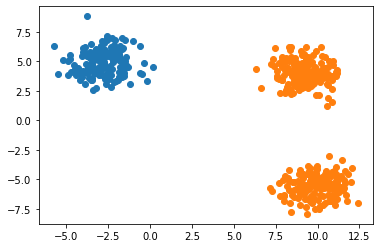

In [ ]:
from sklearn.cluster import SpectralClustering

modelo = SpectralClustering(n_clusters=2)

yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)

for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

## Ejercicios

⭕ ¿Puedes encontrar buenos clusterings para los siguientes datasets?

Prueba los métodos principales que vimos: K-means (¿cómo escoges $K$?), AgglomerativeClustering, DBSCAN para buscar el mejor clustering. Los criterios de evaluación son:

* Silhoutte score
* Adjusted Mutual Information
* Visualmente

In [ ]:
from sklearn.datasets import make_moons, make_blobs

n_samples = 500

DB2 = make_moons(n_samples=n_samples, noise=.05)
DB3 = make_blobs(n_samples=n_samples, random_state=8)
DB4 = np.random.rand(n_samples, 2)
DB5 = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)

Escoger alguno

In [ ]:
X, y = DB2
# X = DB4

Lo graficamos:



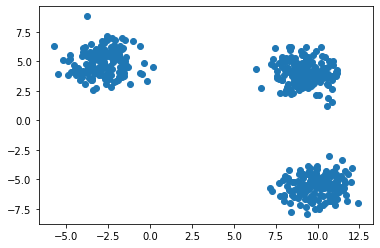

In [123]:
plt.scatter(X[:,0],X[:,1])
plt.show()

Tu codigo:

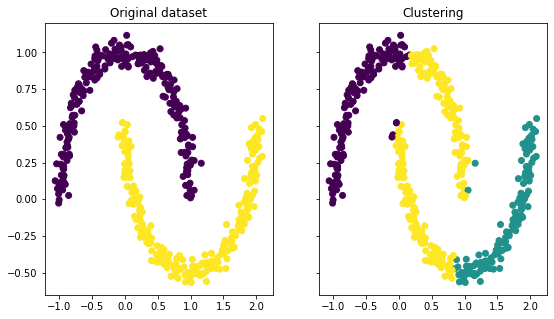

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].scatter(X[:,0],X[:,1], c=y)
axs[0].set_title("Original dataset")
axs[1].scatter(X[:,0],X[:,1], c=y_clusters)
axs[1].set_title("Clustering")
fig.show()

# Un ejemplo

Este conjunto de datos contiene estadísticas de audio de las 2.000 canciones top de Spotify. Los datos contienen alrededor de 15 columnas que describen la canción y algunas de sus cualidades. Se incluyen canciones publicadas desde 1956 hasta 2019 de algunos artistas notables y famosos. Estos datos contienen características de audio como Danceability, BPM, Liveness, Valence(Positivity) y algunas más:

* Índice: ID
* Título: Nombre de la pista
* Artista: Nombre del artista
* Género superior: Género de la pista
* Año: Año de lanzamiento de la pista
* Pulsaciones por minuto (BPM): El tempo de la canción
* Energy: La energía de una canción: cuanto más alto sea el valor, más energética será la canción.
* Danceability: Cuanto más alto sea el valor, más fácil será bailar esta canción.
* Loudness: Cuanto más alto sea el valor, más fuerte será la canción.
* Liveness: ...
* Valence: Cuanto más alto sea el valor, más positivo será el estado de ánimo de la canción.
* Duración: La duración de la canción.
* Acousticness: Cuanto más alto sea el valor, más acústica será la canción.
* Speechiness: Cuanto más alto sea el valor, más palabras habladas contiene la canción.
* Popularity: Cuanto más alto sea el valor, más popular es la canción.

Este dataset se encuentra en [Kaggle](https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset)

In [63]:
!apt-get -qq install > /dev/null subversion

!svn checkout "https://github.com/DCDPUAEM/DCDP_2022/trunk/04%20Clasificaci%C3%B3n%20y%20Agrupamiento/data/"

A    data/Spotify-2000.csv
A    data/creditcard.zip
A    data/diabetes.csv
A    data/dt_classifier.model
A    data/frequencia_palabras.csv
Checked out revision 88.


Cargamos y damos un vistazo al dataset

In [64]:
import pandas as pd

df = pd.read_csv('/content/data/Spotify-2000.csv',index_col=0)

df.reset_index(inplace=True, drop=True)
df.sample(10)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1602,Creep,Radiohead,alternative rock,1993,92,43,52,-10,13,10,239,1,4,82
1074,Spanish Stroll,Mink DeVille,dutch rock,1977,129,45,75,-15,12,95,220,42,6,47
122,Voltooid Verleden Tijd,IOS,dutch pop,2009,138,44,46,-9,10,15,294,66,3,39
1446,Musica è,Eros Ramazzotti,italian pop,1988,125,28,53,-14,18,6,659,24,3,38
818,I Heard It Through The Grapevine,Creedence Clearwater Revival,album rock,1970,119,84,63,-6,10,88,663,8,5,47
723,Leave a Light On,Tom Walker,indie anthem-folk,2017,69,62,59,-6,13,27,186,2,11,75
1304,Relax,Frankie Goes To Hollywood,art rock,1984,115,70,68,-13,5,69,237,33,4,61
1608,I'd Do Anything For Love (But I Won't Do That)...,Meat Loaf,album rock,1993,105,67,42,-6,41,30,316,62,9,59
334,I'm Yours,Jason Mraz,acoustic pop,2008,151,46,69,-8,11,72,242,60,5,82
1472,The Best,Tina Turner,disco,1989,104,74,66,-10,12,75,330,11,3,64


In [80]:
generos = df['Top Genre'].unique()
print(f"Hay {len(generos)} géneros únicos:")
print(generos)

Hay 149 géneros únicos:
['adult standards' 'album rock' 'alternative hip hop' 'alternative metal'
 'classic rock' 'alternative pop rock' 'pop' 'modern rock'
 'detroit hip hop' 'alternative rock' 'dutch indie' 'garage rock'
 'dutch cabaret' 'permanent wave' 'classic uk pop' 'dance pop'
 'modern folk rock' 'dutch pop' 'dutch americana' 'alternative dance'
 'german pop' 'afropop' 'british soul' 'irish rock' 'disco' 'big room'
 'art rock' 'danish pop rock' 'neo mellow' 'britpop' 'boy band'
 'carnaval limburg' 'arkansas country' 'latin alternative' 'british folk'
 'celtic' 'chanson' 'celtic rock' 'hip pop' 'east coast hip hop'
 'dutch rock' 'blues rock' 'electro' 'australian pop' 'belgian rock'
 'downtempo' 'reggae fusion' 'british invasion' 'finnish metal'
 'canadian pop' 'bow pop' 'dutch hip hop' 'dutch metal' 'soft rock'
 'acoustic pop' 'acid jazz' 'dutch prog' 'candy pop' 'operatic pop'
 'trance' 'scottish singer-songwriter' 'mellow gold' 'alternative pop'
 'dance rock' 'atl hip hop' 'e

In [65]:
df.describe()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


A manera de análisis exploratorio, veamos las correlaciones entre variables, ¿qué observamos?

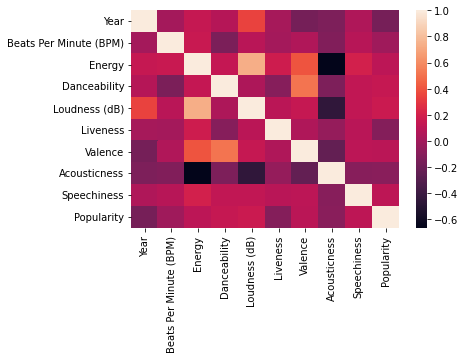

In [68]:
# df.corr()
from seaborn import heatmap 
import matplotlib.pyplot as plt

correlaciones = df.corr()
heatmap(correlaciones)
plt.show()

Dado que algunos métodos de clustering son susceptibles a la escala de valores, hacemos un escalamiento.

In [85]:
from sklearn.preprocessing import MinMaxScaler

display(df.head(3))

df2 = df[["Beats Per Minute (BPM)", "Loudness (dB)", 
              "Liveness", "Valence", "Acousticness", 
              "Speechiness"]].copy()

scaler = MinMaxScaler()
df2[df2.columns] = scaler.fit_transform(df2[df2.columns])

df2.head(3)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Music Segments
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,Cluster 7
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,Cluster 5
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,Cluster 6


,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness
0,0.710059,0.52,0.092784,0.677083,0.949495,0.018868
1,0.579882,0.64,0.154639,0.812500,0.171717,0.094340
2,0.775148,0.72,0.051546,0.510417,0.020202,0.283019


In [71]:
df2.describe()

,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.492400,0.719659,0.175382,0.483424,0.291496,0.056509
std,0.165847,0.145915,0.172447,0.258940,0.293050,0.083048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.366864,0.640000,0.072165,0.270833,0.030303,0.018868
50%,0.485207,0.760000,0.103093,0.458333,0.181818,0.037736
75%,0.585799,0.840000,0.216495,0.695312,0.505051,0.056604
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Usamos K-means para segmentar en 10 grupos

In [91]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=10)

modelo.fit(df2.values)
clusters = modelo.labels_ 

print(f"Las primeras 10 etiquetas: {clusters[:10]}")

Las primeras 10 etiquetas: [0 2 7 7 2 8 1 8 7 1]


Integramos la información de los clusters al dataframe original.

In [89]:
df["Music Segments"] = clusters
df["Music Segments"] = df["Music Segments"].map({0: "Cluster 1", 1: 
    "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5", 
    5: "Cluster 6", 6: "Cluster 7", 7: "Cluster 8", 
    8: "Cluster 9", 9: "Cluster 10"})
df.head(5)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Music Segments
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,Cluster 3
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,Cluster 6
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,Cluster 1
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,Cluster 1
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,Cluster 6


Graficamos usando solamente 3 features. Usamos el módulo [plotly](https://plotly.com/python/) para gráficas interactivas. 

Otra alternativa es [Bokeh](https://bokeh.org/).

In [97]:
import plotly.graph_objects as go

PLOT = go.Figure()

for i in list(df["Music Segments"].unique()):
    PLOT.add_trace(go.Scatter3d(x = df[df["Music Segments"]==i]['Beats Per Minute (BPM)'],
                                    y = df[df["Music Segments"] ==i]['Energy'],
                                    z = df[df["Music Segments"] ==i]['Danceability'],                        
                                    mode = 'markers',marker_size = 6, marker_line_width = 1,
                                    name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')
    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'black'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'black')),
                   font = dict(family = "Arial", color  = 'black', size = 12))

Usando sólo dos dimensiones:

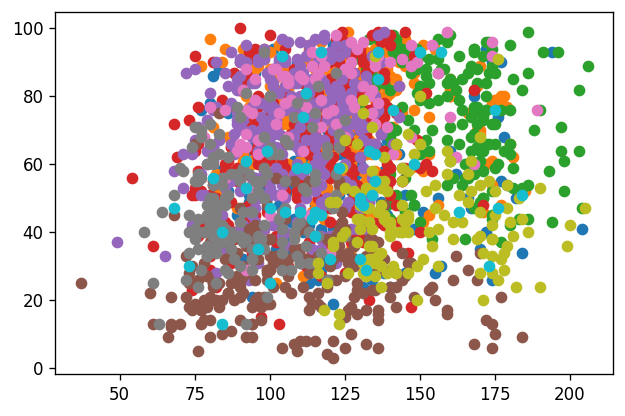

In [99]:
plt.figure(dpi=120)
for segment in df["Music Segments"].unique():
    plt.scatter(x = df[df["Music Segments"]==segment]['Beats Per Minute (BPM)'],
                y = df[df["Music Segments"] ==segment]['Energy'])
plt.show()

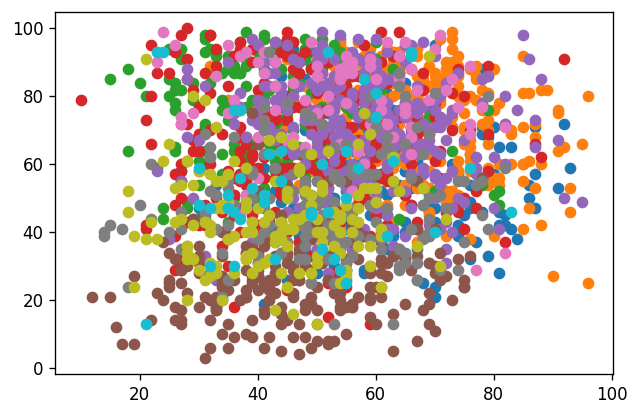

In [100]:
plt.figure(dpi=120)
for segment in df["Music Segments"].unique():
    plt.scatter(x = df[df["Music Segments"]==segment]['Danceability'],
                y = df[df["Music Segments"] ==segment]['Energy'])
plt.show()

⭕ Preguntas:
* Siendo K-Means, ¿por qué se no se ve la separación perfecta?
* ¿Qué valor de K es mejor? Puedes usar cualquiera de los 3 criteros de arriba, empezando por el *elbow value*.
* Una vez que hayas escogido un valor para $K$, reportar los valores de las 3 métricas de clustering.

⭕ Ejercicios: 

* Repetir el experimento, ahora usando Agglomerative Clustering y DBSCAN.
* ¿Puedes elevar las métricas de clustering?